## Sales Data Analysis
This is a sample end-to-end use case of analysing sales data of an online store. The main steps are: <br>
 1) Data Cleaning <br> 
 2) Data Wrangling<br>
 3) Data Visualisation<br>




We answer the following questions:
* Which State and Cities make the highest orders
* What time of the day are most orders made; hence best time of the day for advertising
* What are the most popular products
* What products are bought together

#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime as dt
import matplotlib.pyplot as plt

#### First Look

In [2]:
data = pd.read_csv('Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/Sales_December_2019.csv')
data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


#### Task 1: Merge all monthly files 

In [3]:
data_dir = 'Pandas-Data-Science-Tasks-master/SalesAnalysis/Sales_Data/'
data  = pd.DataFrame()  ## Initialise the dataframe
for file in os.listdir(data_dir):
    data = pd.concat([data,pd.read_csv(data_dir + file)])

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
Order ID            186305 non-null object
Product             186305 non-null object
Quantity Ordered    186305 non-null object
Price Each          186305 non-null object
Order Date          186305 non-null object
Purchase Address    186305 non-null object
dtypes: object(6)
memory usage: 10.0+ MB


#### Question: What is the best month for sales and how much was earned that month

In [5]:
## Get a column with month value
# data['month'] = data['Order Date'].str[0:2].astype('int')
## ERROR

#### Tasks
- Data has NaN. Hence **drop NaNs**. 
- Data has 'Or' as month in some dates, so remove them
- change data type for calculation 

In [6]:
data2 = data.dropna()
data2 = data2[data2['Order Date'].str[0:2] != 'Or']
data2['Month'] = data2['Order Date'].str[0:2].astype('int')
data2['Sales'] = pd.to_numeric(data2['Quantity Ordered'])*pd.to_numeric(data2['Price Each'])

In [7]:
data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95


Text(0, 0.5, 'Sales ($)')

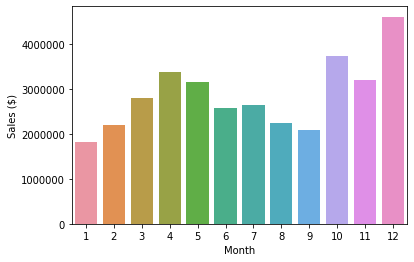

In [8]:
data_gp_mnth  = data2.groupby('Month').sum()
sns.barplot(y = data_gp_mnth['Sales'],   x = data_gp_mnth.index)
plt.ylabel('Sales ($)')

#### Question: Which State had the highest sales?

In [9]:
data2['State'] = data2['Purchase Address'].str[-9:-6]
data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA


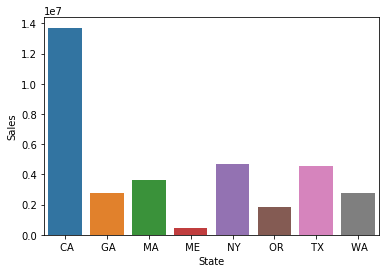

In [10]:
data_gp_state  = data2.groupby('State').sum()
sns.barplot(y = data_gp_state['Sales'], x = data_gp_state.index)

#### Question: Which city had the highest sales?

#### Task Get City Name Column

In [11]:
data2['City'] = data2['Purchase Address'].apply(lambda x : x.split(',')[1])
data2.head()
data2['City, State'] = data2['City'] + ', ' + data2['State']

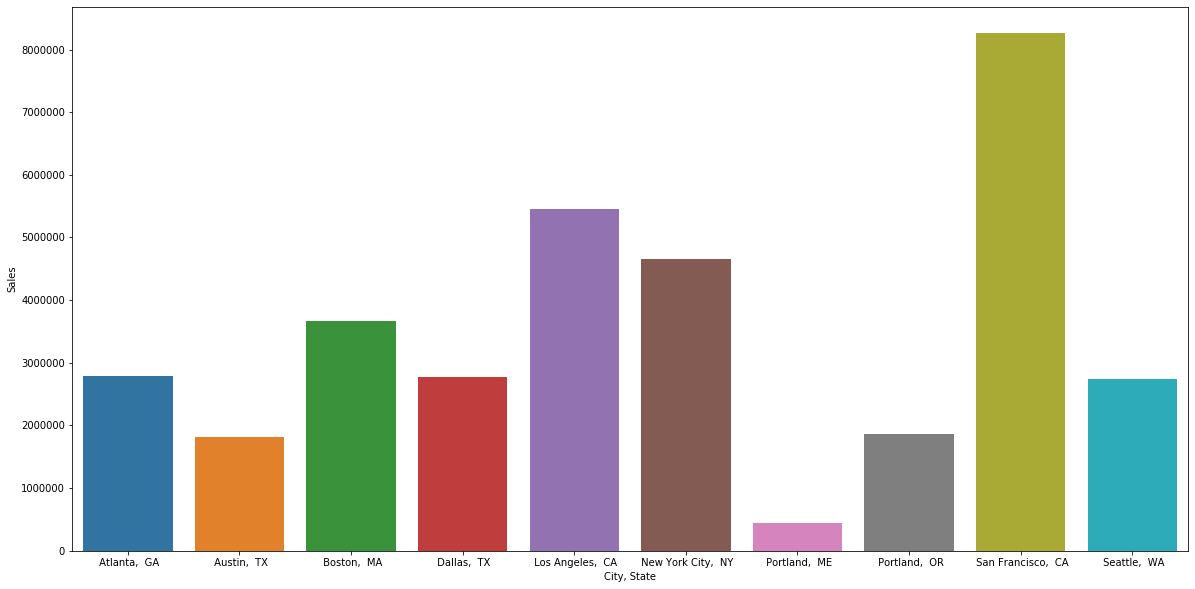

In [12]:
data_gp_city = data2.groupby('City, State').sum()
plt.figure(figsize=(20,10))
sns.barplot(x = data_gp_city.index , y = data_gp_city.Sales)

#### What time a customer should advertise the product for maximising liklihood of buying

In [13]:
data2['Order Time'] = data2['Order Date'].apply(lambda x : x.split(' ')[1])
data2['Order Hour'] = data2['Order Time'].apply(lambda x : x.split(':')[0])
data2.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,"City, State",Order Time,Order Hour
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001",12,1700.00,NY,New York City,"New York City, NY",00:01,00
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001",12,600.00,NY,New York City,"New York City, NY",07:03,07
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001",12,11.95,NY,New York City,"New York City, NY",18:21,18
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,CA,San Francisco,"San Francisco, CA",15:13,15
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,GA,Atlanta,"Atlanta, GA",12:38,12


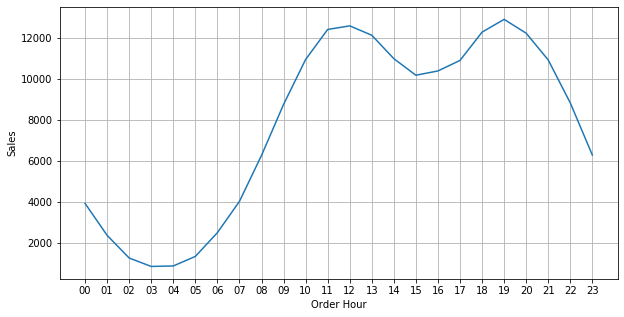

In [14]:
data_gp_hour = data2.groupby('Order Hour').count()
data_gp_hour.head()
plt.figure(figsize=(10,5))
plt.grid()
sns.lineplot(x = data_gp_hour.index, y = data_gp_hour['Sales'])


#### Which is the most popular product; and plot it against the Sale value

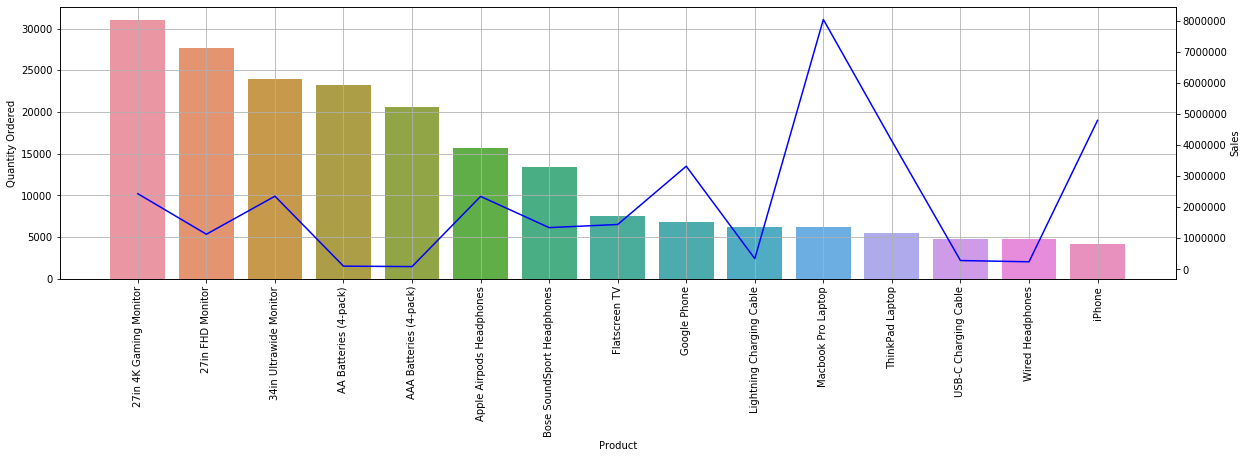

In [61]:
n = 15  ### Number of products to see in the plot
data2['Quantity Ordered'] = data2['Quantity Ordered'].astype('int')
data_product_gp = data2.groupby('Product').sum()
data_product_gp = data_product_gp.sort_values(by='Quantity Ordered',ascending=False)
plt.figure(figsize=(20,5))
g = sns.barplot(x = data_product_gp.index[0:n], y = data_product_gp['Quantity Ordered'][0:n])
g.set_xticklabels(data_product_gp.index[0:n],rotation=90)
ax2 = plt.twinx()
sns.lineplot(data=data_product_gp['Sales'][0:n], color="b", ax=ax2)
ax2.set(ylabel = 'Sales')
g.grid()

#### What products are sold together

In [72]:
data2.head()
## keep duplicated order
data3 = data2[data2.duplicated('Order ID', keep=False)]
## this also works -> data3 = data2[data2['Order ID'].duplicated(keep=False)]
data3['Grouped Products'] = data3.groupby('Order ID')['Product'].transform(lambda x : ',' .join(x))
data3.head()
data3.drop_duplicates(inplace=True)
data3.head()

/Users/charu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/charu/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,"City, State",Order Time,Order Hour,Grouped Products
16,295681,Google Phone,1,600,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,600.00,MA,Boston,"Boston, MA",12:37,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
17,295681,USB-C Charging Cable,1,11.95,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.95,MA,Boston,"Boston, MA",12:37,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
18,295681,Bose SoundSport Headphones,1,99.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,99.99,MA,Boston,"Boston, MA",12:37,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
19,295681,Wired Headphones,1,11.99,12/25/19 12:37,"79 Elm St, Boston, MA 02215",12,11.99,MA,Boston,"Boston, MA",12:37,12,"Google Phone,USB-C Charging Cable,Bose SoundSp..."
36,295698,Vareebadd Phone,1,400,12/13/19 14:32,"175 1st St, New York City, NY 10001",12,400.00,NY,New York City,"New York City, NY",14:32,14,"Vareebadd Phone,USB-C Charging Cable"


In [82]:
data_gp_group = data3.groupby('Grouped Products').count()
data_gp_group.sort_values(by = 'Sales', ascending=False)[0:5]


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,State,City,"City, State",Order Time,Order Hour
Grouped Products,,,,,,,,,,,,,
"iPhone,Lightning Charging Cable",1764,1764,1764,1764,1764,1764,1764,1764,1764,1764,1764,1764,1764
"Google Phone,USB-C Charging Cable",1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712,1712
"iPhone,Wired Headphones",722,722,722,722,722,722,722,722,722,722,722,722,722
"Vareebadd Phone,USB-C Charging Cable",624,624,624,624,624,624,624,624,624,624,624,624,624
"Google Phone,Wired Headphones",606,606,606,606,606,606,606,606,606,606,606,606,606
